# 1) Import Library

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm, skew

from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

# 2) Import Data

In [2]:
column_name = ["MPG" ,"Cylinders", "Displacement", "Horsepower","Weight",
              "Acceleration", "Model Year", "Origin"]

In [3]:
data = pd.read_csv("auto-mpg.data", names = column_name, na_values = "?", comment = "\t", sep = " ",
                  skipinitialspace = True)

In [4]:
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [5]:
data = data.rename(columns = {"MPG":"target"})

In [6]:
data.head()

,target,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   target        398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [8]:
data.shape

(398, 8)

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
target,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
Cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
Displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
Horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
Weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
Acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
Model Year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
Origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


# 3) Missing Value

In [10]:
data.isnull().sum()

target          0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [11]:
data[data["Horsepower"].isnull()]

,target,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
32,25.0,4,98.0,NaN,2046.0,19.0,71,1
126,21.0,6,200.0,NaN,2875.0,17.0,74,1
330,40.9,4,85.0,NaN,1835.0,17.3,80,2
336,23.6,4,140.0,NaN,2905.0,14.3,80,1
354,34.5,4,100.0,NaN,2320.0,15.8,81,2
374,23.0,4,151.0,NaN,3035.0,20.5,82,1


In [12]:
data["Horsepower"] = data["Horsepower"].fillna(data["Horsepower"].mean())

In [13]:
data.isnull().sum()

target          0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

# 4) EDA

In [14]:
plt.style.use("fivethirtyeight")
def numeric(col, discrete = False):
    if discrete :
        fig, ax = plt.subplots(1, 2, figsize = (15,6))
        sns.stripplot(x = data[col], y = data["target"], ax = ax[0])
        sns.countplot(data[col], ax = ax[1])
        fig.suptitle(str(col) + ' Analysis')
    else :
        fig, ax = plt.subplots(1, 2, figsize = (15,6))
        sns.scatterplot(x = data[col], y = data["target"], ax = ax[0])
        sns.distplot(x = data[col], kde = False, ax = ax[1])
        fig.suptitle(str(col) + ' Analysis')

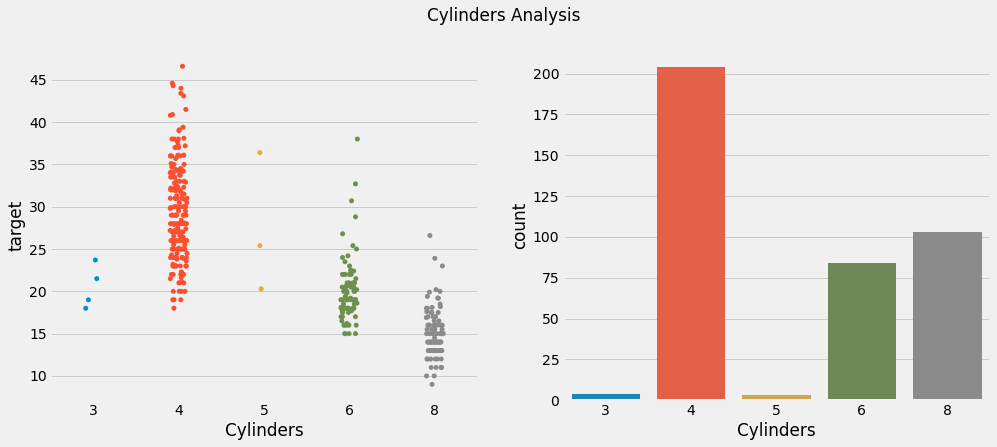

In [15]:
numeric("Cylinders", True)

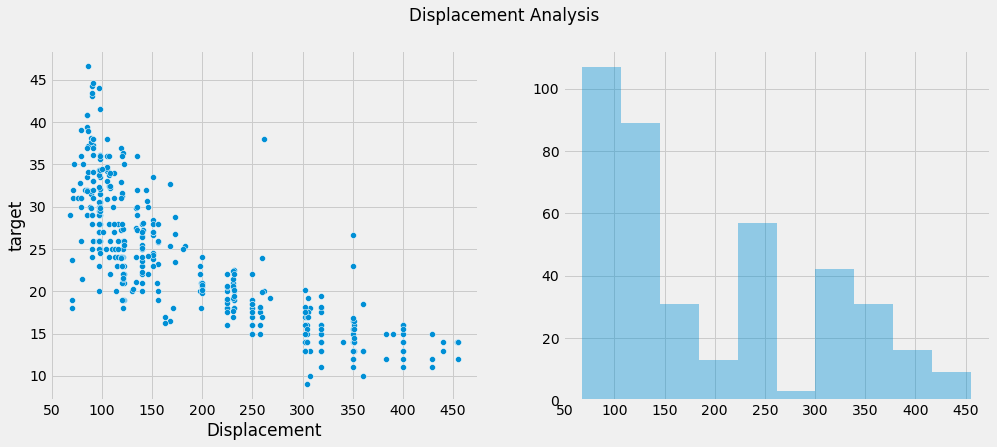

In [16]:
numeric("Displacement")

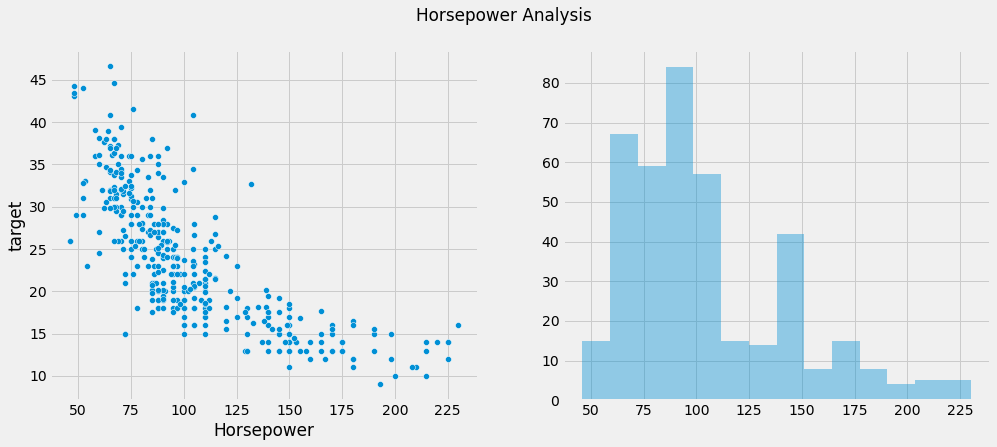

In [17]:
numeric("Horsepower")

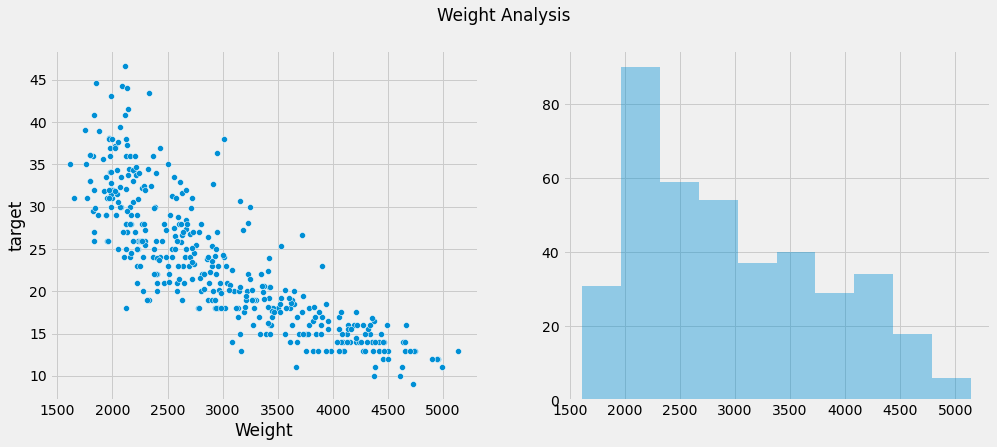

In [18]:
numeric("Weight")

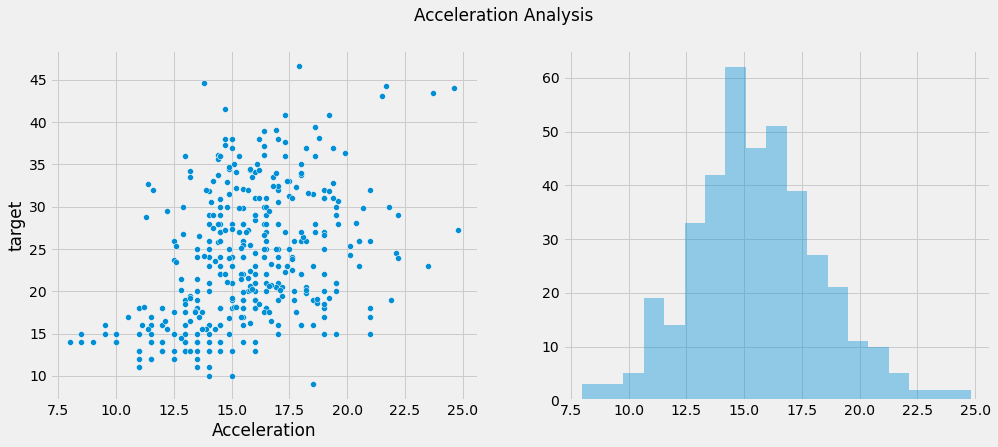

In [19]:
numeric("Acceleration")

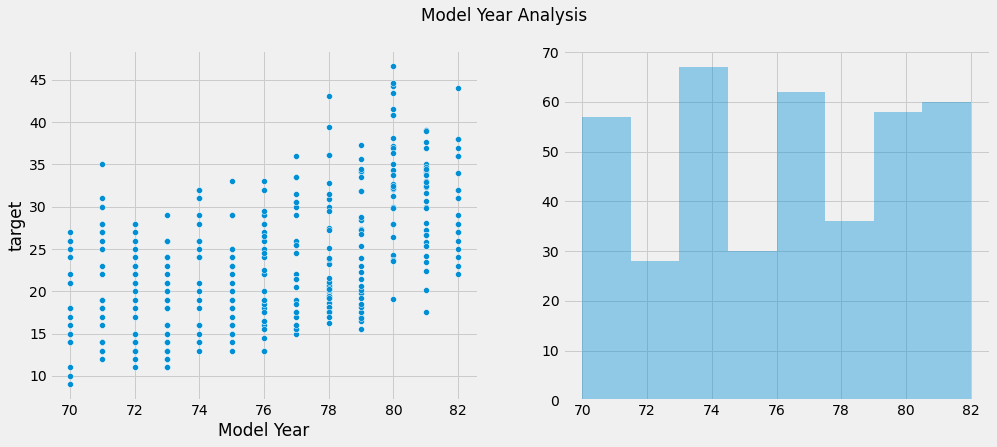

In [20]:
numeric("Model Year")

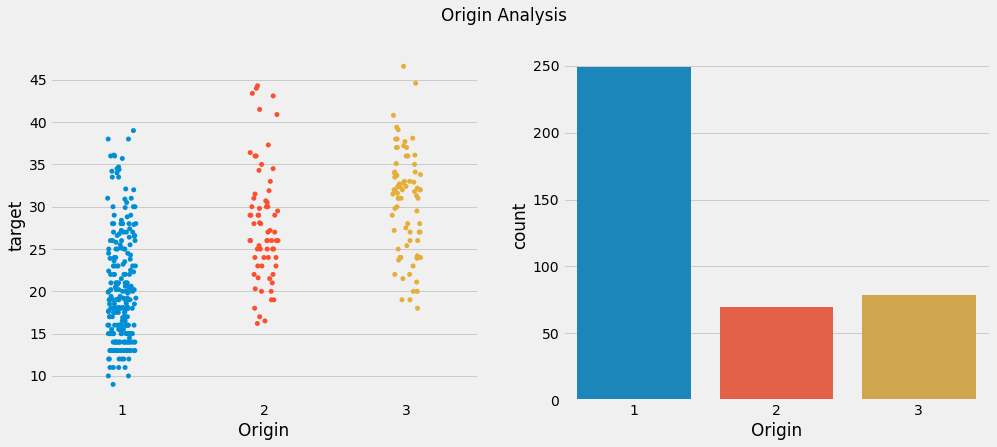

In [21]:
numeric("Origin", True)

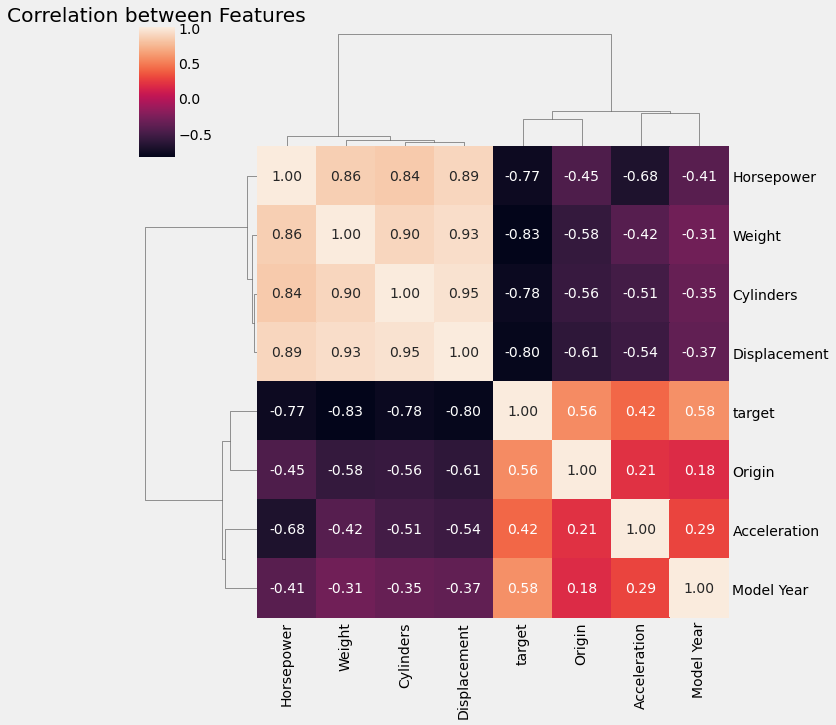

In [22]:
corr_matrix = data.corr()
sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Correlation between Features")
plt.show()

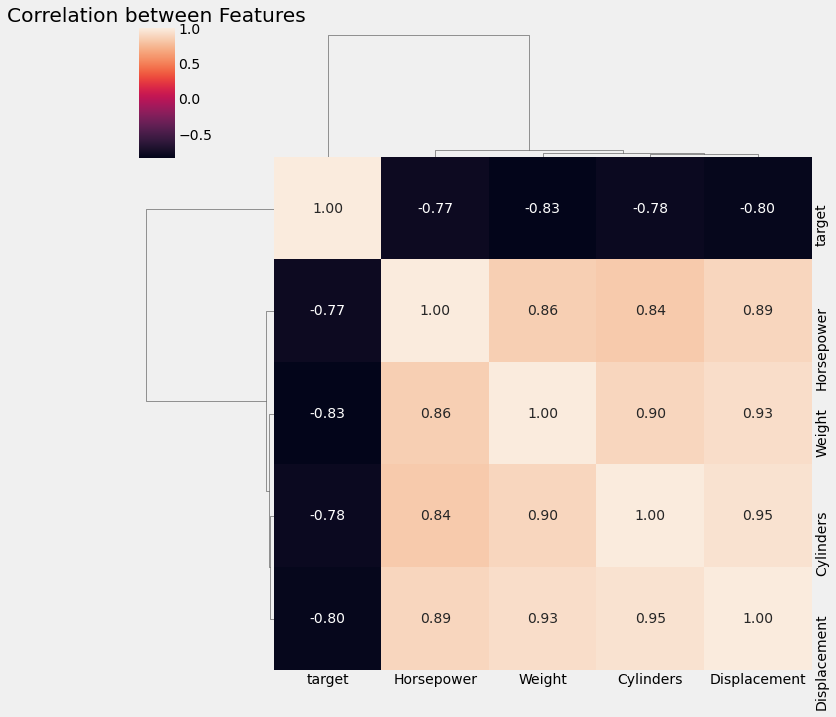

In [23]:
threshold = 0.75
filtre = np.abs(corr_matrix["target"])>threshold
corr_features = corr_matrix.columns[filtre].tolist()
sns.clustermap(data[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("Correlation between Features")
plt.show()

In [24]:
data.corr()["target"].sort_values(ascending = False)

target          1.000000
Model Year      0.579267
Origin          0.563450
Acceleration    0.420289
Horsepower     -0.771437
Cylinders      -0.775396
Displacement   -0.804203
Weight         -0.831741
Name: target, dtype: float64

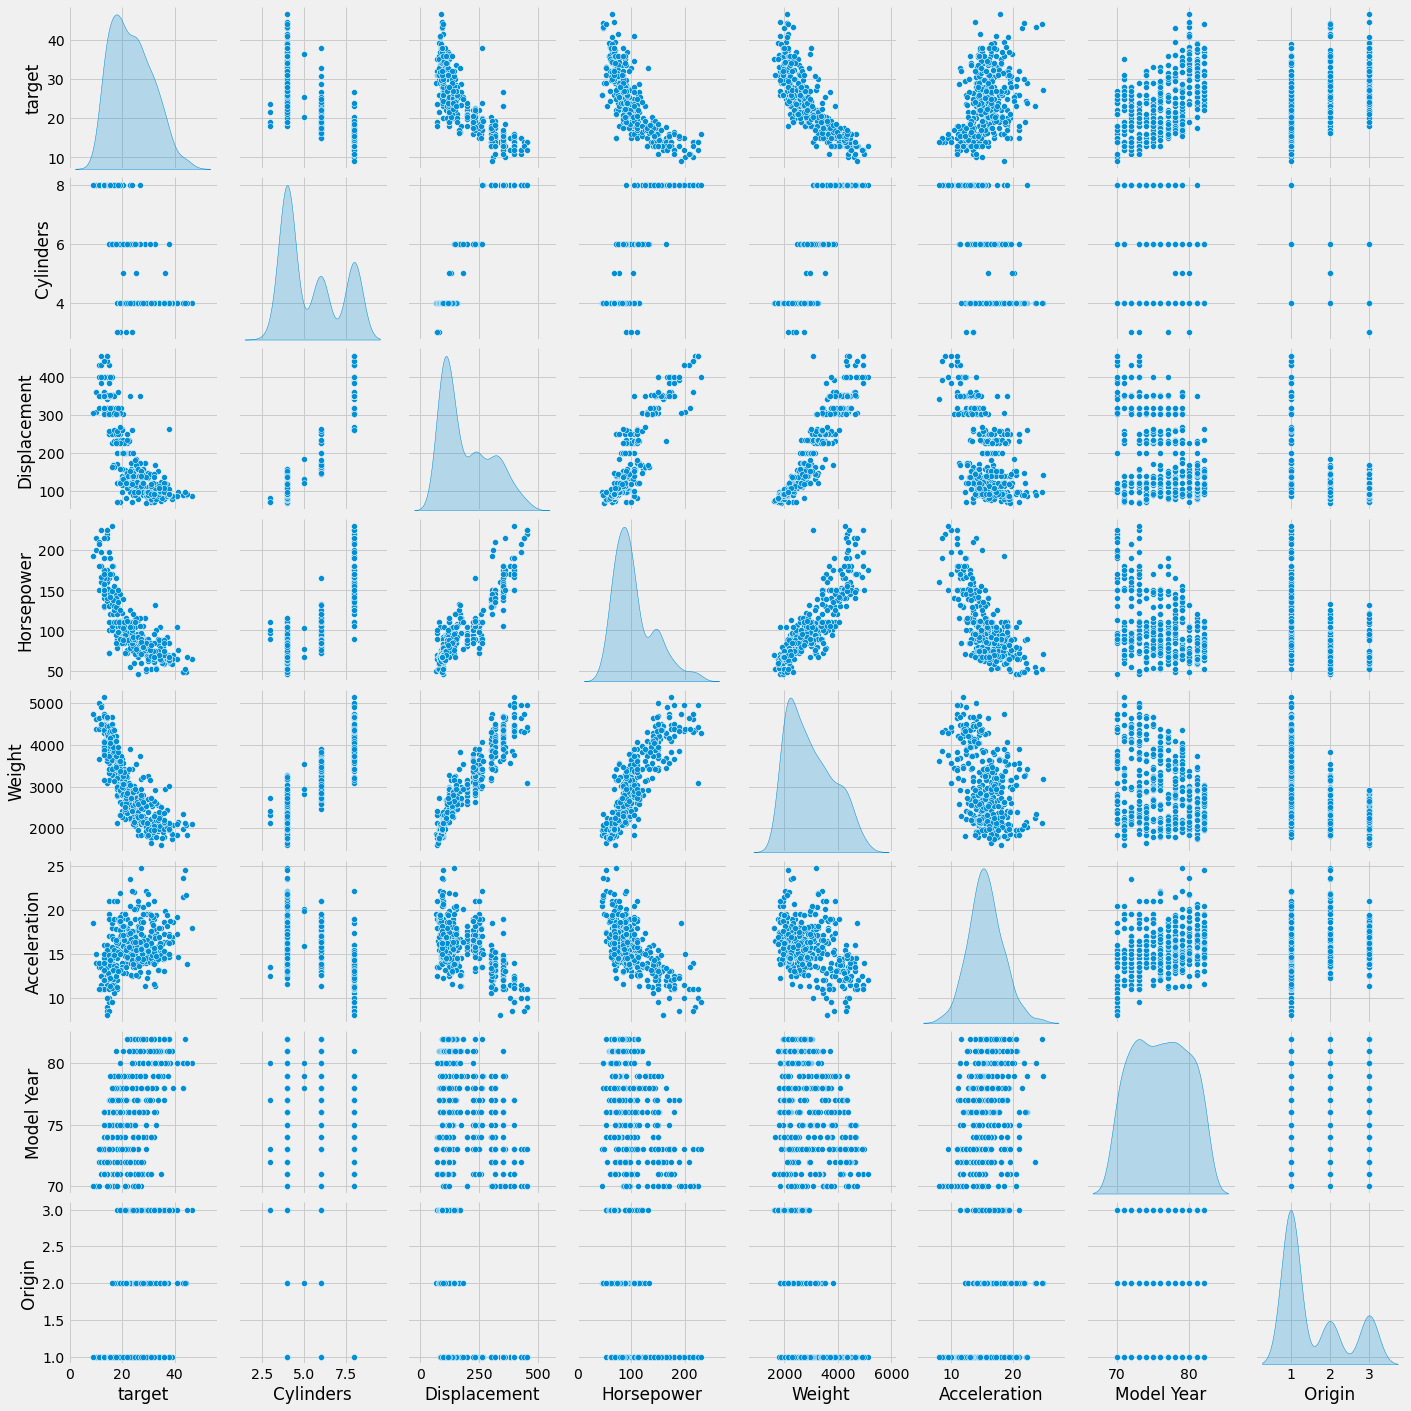

In [25]:
# All features visualization
sns.pairplot(data, diag_kind = "kde")

Cylinders and origin can be categorical

# 5) Outlier Detection

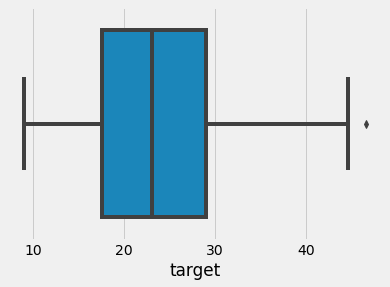

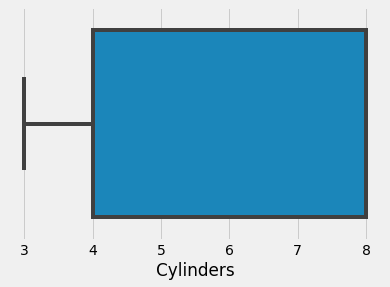

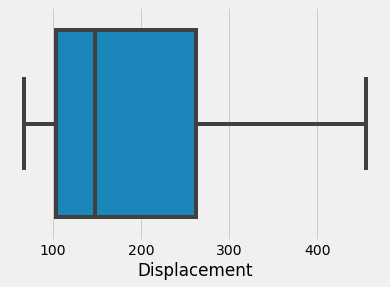

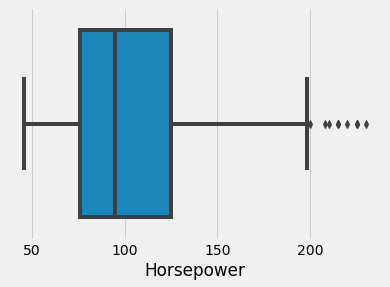

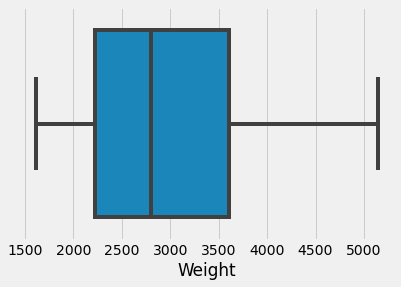

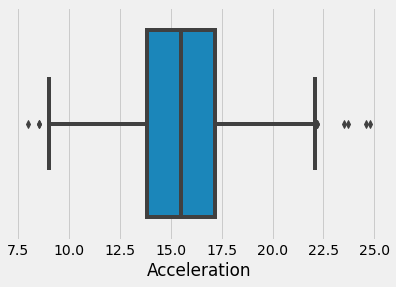

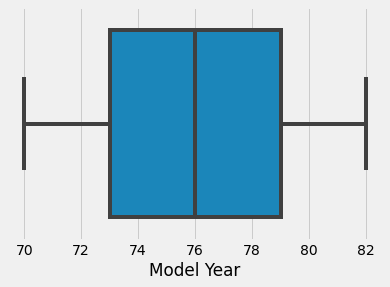

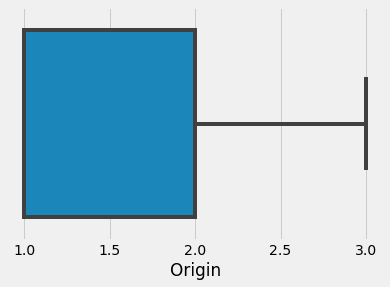

In [26]:
for i in data.columns:
    plt.figure()
    sns.boxplot(x = i, data = data, orient = "v")

Outlier : Horsepower and Acceleration

In [27]:
from collections import Counter

In [28]:
aykiri_indexler=[]
columns_ = ["Horsepower", "Acceleration"]
for i in columns_:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3 -Q1
    alt_sinir = Q1 - 2*IQR
    ust_sinir = Q3 + 2*IQR
    filtre = ((data[i] < alt_sinir) | (data[i] > ust_sinir))
    aykiri_gozlemler = data[i][filtre]
    aykiri_index = aykiri_gozlemler.index
    aykiri_indexler.extend(aykiri_index)
    

data = data.drop(aykiri_indexler,axis=0).reset_index(drop=True)

In [29]:
data.shape

(392, 8)

# 6) Feature Engineering

<AxesSubplot:xlabel='target', ylabel='Density'>

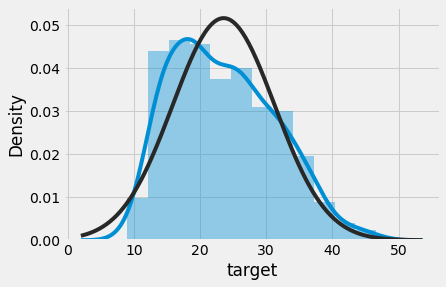

In [30]:
#Target variable
sns.distplot(data.target, fit = norm)

In [31]:
(mu, sigma) = norm.fit(data["target"])
print("mu: {}, sigma = {}".format(mu,sigma))

mu: 23.55, sigma = 7.7342235735537335


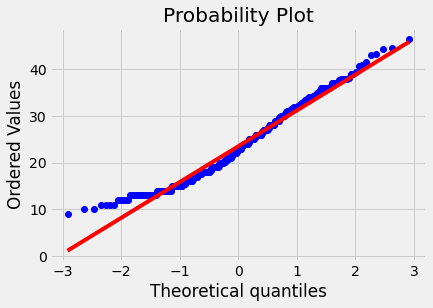

In [32]:
#qq plot
plt.figure()
stats.probplot(data["target"], plot = plt)
plt.show()

<AxesSubplot:xlabel='target', ylabel='Density'>

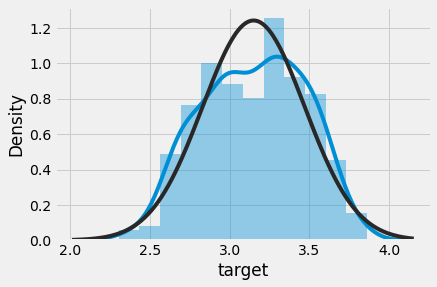

In [33]:
data["target"] = np.log1p(data["target"])
plt.figure()
sns.distplot(data.target, fit = norm)

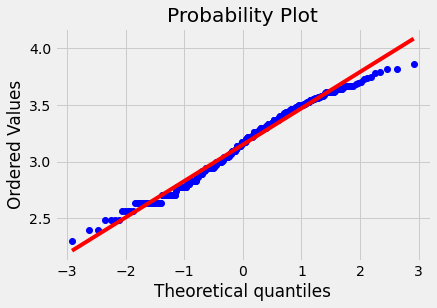

In [34]:
#qq plot
plt.figure()
stats.probplot(data["target"], plot = plt)
plt.show()

In [35]:
#Feature - İndependent variable

In [36]:
skewed_feats = data.apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skewness = pd.DataFrame(skewed_feats, columns = ["skewed"])

In [37]:
# Çarpıklık değerleri
skewness

,skewed
Horsepower,0.997460
Origin,0.911679
Displacement,0.695857
Cylinders,0.543555
Weight,0.534367
Acceleration,0.190781
Model Year,0.005678
target,-0.127043


In [38]:
# One hot encoding

In [39]:
data["Cylinders"] = data["Cylinders"].astype(str)
data["Origin"] = data["Origin"].astype(str)
data = pd.get_dummies(data)

In [40]:
data

,target,Displacement,Horsepower,Weight,Acceleration,Model Year,Cylinders_3,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Origin_1,Origin_2,Origin_3
0,2.944439,307.0,130.0,3504.0,12.0,70,0,0,0,0,1,1,0,0
1,2.772589,350.0,165.0,3693.0,11.5,70,0,0,0,0,1,1,0,0
2,2.944439,318.0,150.0,3436.0,11.0,70,0,0,0,0,1,1,0,0
3,2.833213,304.0,150.0,3433.0,12.0,70,0,0,0,0,1,1,0,0
4,2.890372,302.0,140.0,3449.0,10.5,70,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,3.332205,151.0,90.0,2950.0,17.3,82,0,1,0,0,0,1,0,0
388,3.332205,140.0,86.0,2790.0,15.6,82,0,1,0,0,0,1,0,0
389,3.496508,135.0,84.0,2295.0,11.6,82,0,1,0,0,0,1,0,0
390,3.367296,120.0,79.0,2625.0,18.6,82,0,1,0,0,0,1,0,0


# 7) ML Model

In [41]:
y = data.target
x = data.drop(["target"], axis = 1)

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.9, random_state = 42)

In [43]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Linear Regression
* Bu metotda least-squared error minimize edilmeye çalışılır.

In [44]:
lr = LinearRegression()
model = lr.fit(x_train, y_train)
print("LR Coef:", model.coef_)
y_head = model.predict(x_test)
mse = mean_squared_error(y_test, y_head)
print("Linear Regression MSE:", mse)

LR Coef: [-3.51782924e-02 -2.23385982e-02 -1.26882569e-01 -8.61145750e-03
  1.28419806e-01 -4.85722573e-17  8.03260264e-03 -3.40115606e-02
 -5.06934682e-03  1.91175617e-02 -2.46553976e-02  3.87686592e-02
 -1.44674106e-02]
Linear Regression MSE: 0.015650571603704224


## Ridge Regression
* Amacımız modelimizde oluşabilecek overfitting'i azaltmaktır. Regularize etmektir.
* Bu methotda least-squared error+ lambda*(slope)^2 minimize edilmeye çalışılır.

In [47]:
ridge = Ridge(random_state = 42, max_iter = 10000)
alphas = np.logspace(-4,-0.5, 30)
parameters = [{"alpha":alphas}]
clf = GridSearchCV(ridge, parameters, cv = 5, scoring = "neg_mean_squared_error",
                  refit = True)
clf.fit(x_train, y_train)
print("Ridge Best Estimator:", clf.best_estimator_)
print("Ridge Best Params: ", clf.best_params_)
y_head_ridge = clf.predict(x_test)
mse = mean_squared_error(y_test, y_head_ridge)
print("Ridge Regression MSE:", mse)

Ridge Best Estimator: Ridge(alpha=0.31622776601683794, max_iter=10000, random_state=42)
Ridge Best Params:  {'alpha': 0.31622776601683794}
Ridge Regression MSE: 0.015444432033230704


## Lasso Regression
* lse + lambda*|slope| minimize edilir.

In [56]:
lasso = Lasso(random_state = 42, max_iter = 10000)
alphas = np.logspace(-4,-0.5, 30)
parameters = [{"alpha":alphas}]
clf = GridSearchCV(lasso, parameters, cv = 5, scoring = "neg_mean_squared_error",
                  refit = True)
clf.fit(x_train, y_train)
lasso_ = clf.best_estimator_
print("Lasso Best Estimator:", lasso_)
print("Lasso Coef:", clf.best_estimator_.coef_)
y_head_lasso = clf.predict(x_test)
mse = mean_squared_error(y_test, y_head_lasso)
print("Lasso  Regression MSE:", mse)

Lasso Best Estimator: Lasso(alpha=0.0196382800192977, max_iter=10000, random_state=42)
Lasso Coef: [-0.         -0.00146856 -0.13531598 -0.          0.09890235  0.
  0.0364134  -0.         -0.         -0.         -0.01453138  0.01804542
  0.        ]
Lasso  Regression MSE: 0.014947487693727453


## ElasticNet
* Hepsi birleştirilir
* (lse + lambda1*(slope)^2 + lambda2*|slope| ) minimize edilir

In [47]:
elastic = ElasticNet(random_state = 42, max_iter = 10000)
alphas = np.logspace(-4,-0.5, 30)
parameters = [{"alpha":alphas,
              "l1_ratio":np.arange(0.0,1.0,0.05)}]
clf = GridSearchCV(elastic, parameters, cv = 5, scoring = "neg_mean_squared_error",
                  refit = True)
clf.fit(x_train, y_train)
print("Elastic Best Estimator:", clf.best_estimator_)
print("Elastic Coef:", clf.best_estimator_.coef_)
y_head_lasso = clf.predict(x_test)
mse = mean_squared_error(y_test, y_head_lasso)
print("ElasticNet MSE:", mse)

Elastic Best Estimator: ElasticNet(alpha=0.02592943797404667, l1_ratio=0.8, max_iter=10000,
           random_state=42)
Elastic Coef: [-0.         -0.00400466 -0.1304921  -0.          0.09637884  0.
  0.03759054 -0.         -0.         -0.         -0.01612144  0.01586789
  0.        ]
ElasticNet MSE: 0.015082843639234527


* Sonuclar :
    * Linear Regression MSE:  0.015650571603704224
    * Ridge Regression MSE :  0.015444432033230704
    * Lasso Regression MSE:   0.014947487693727453
    * ElasticNet MSE:         0.015082843639234527

## XGBoost

In [55]:
parametersGrid = {'nthread':[4],
                 "objective":["reg:linear"],
                 "learning_rate":[.03,0.05,.07],
                 "max_depth":[5,6,7],
                 "min_child_weight":[4],
                 "silent":[1],
                 "subsample":[0.7],
                 "colsample_bytree":[0.7],
                 "n_estimators":[500,1000]}
xgb_ = xgb.XGBRegressor()
clf = GridSearchCV(xgb_, parametersGrid, cv=5, scoring = "neg_mean_squared_error",
                  refit = True, n_jobs = 5)
clf.fit(x_train,y_train)
model_xgb = clf.best_estimator_
y_head_xgb = clf.predict(x_test)
print("XGRegressor MSE:", mean_squared_error(y_test, y_head_xgb))

XGRegressor MSE: 0.016814962771534783


# 8) Averaging Model
* En iyi iki MSE sonucunun ortalmasıyla yeni bir model oluşturuyoruz. En iyi iki modelimiz Lasso ve XGBoost

In [62]:
class AveragingModels():
    def __init__(self,models):
        self.models = models
        
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        for model in self.models_ :
            model.fit(X,y)
            
        return self
    
    def predict(self, X):
        predictions = np.column_stack([model.predict(X) for model in self.models_])
        return np.mean(predictions,axis = 1)

In [63]:
averaged_models = AveragingModels(models = (model_xgb, lasso_))
averaged_models.fit(x_train,y_train)

y_head_average = averaged_models.predict(x_test)
mse = mean_squared_error(y_test, y_head_average)
print("Averaged Models MSE:",mse)

Averaged Models MSE: 0.01427759746361839
